In [1]:
#!/usr/bin/env python3

In [2]:
# import librarys
import pandas as pd
#import matplotlib.pyplot as plt
from urllib.parse import urlsplit

In [3]:
# pathes
#csv = '../data/database/db_01_original.csv'
csv = '../data/database/db_04_analyzed.csv'

In [4]:
# read csv data
df = pd.read_csv(csv)

In [5]:
# get shape
df.shape

(437, 14)

In [6]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        437 non-null    int64  
 1   contributors      433 non-null    float64
 2   created_at        378 non-null    object 
 3   description       432 non-null    object 
 4   keywords          437 non-null    object 
 5   language_primary  425 non-null    object 
 6   languages         433 non-null    object 
 7   licence           410 non-null    object 
 8   ml_detected       437 non-null    float64
 9   ml_libs           437 non-null    object 
 10  pushed_at         433 non-null    object 
 11  stars             378 non-null    float64
 12  stars_score       437 non-null    float64
 13  url               433 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 47.9+ KB


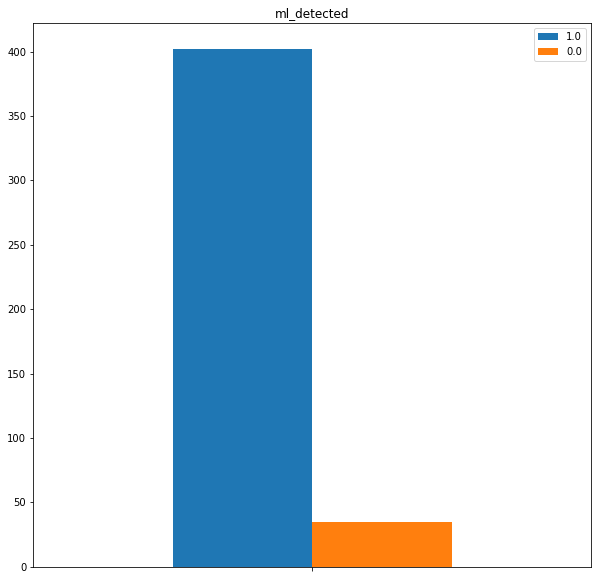

In [7]:
# diagram function
def chart_feature(feature):
    n = df[feature].value_counts()
    df2=pd.DataFrame([n], index=[''])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title=feature)
    fig = ax.get_figure()
    fig.savefig(feature + '.png')
    
# create diagram for true ml use cases
chart_feature('ml_detected')

In [8]:
# reduce data to true ml use cases
df = df[df.ml_detected != 0]
df.shape

(402, 14)

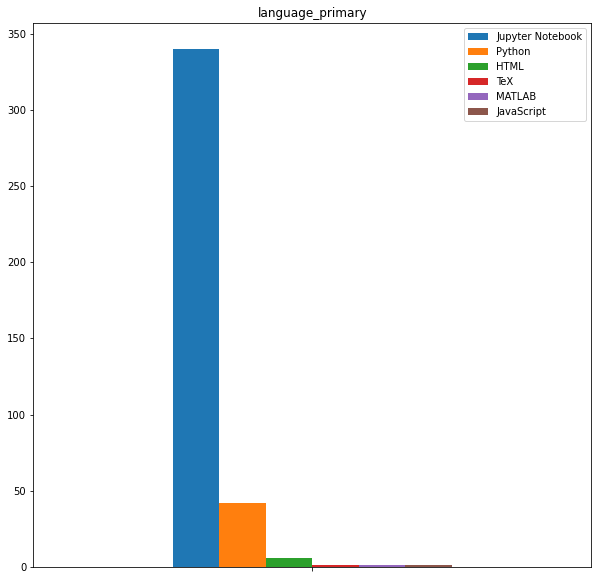

In [9]:
# create diagram for primary language
chart_feature('language_primary')

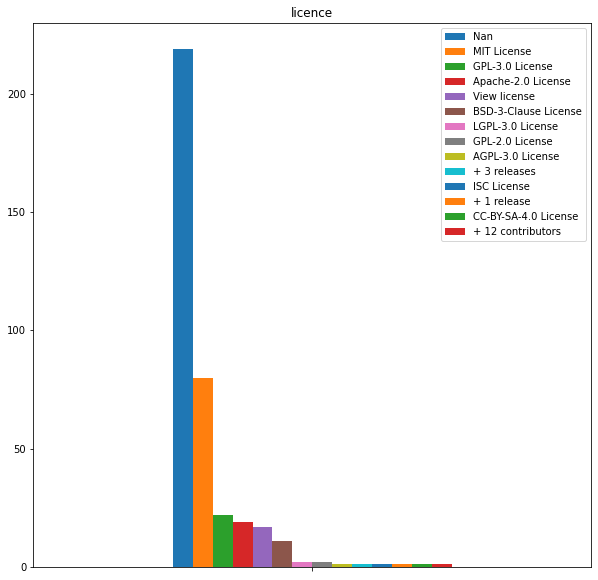

In [10]:
# create diagram for license
chart_feature('licence')

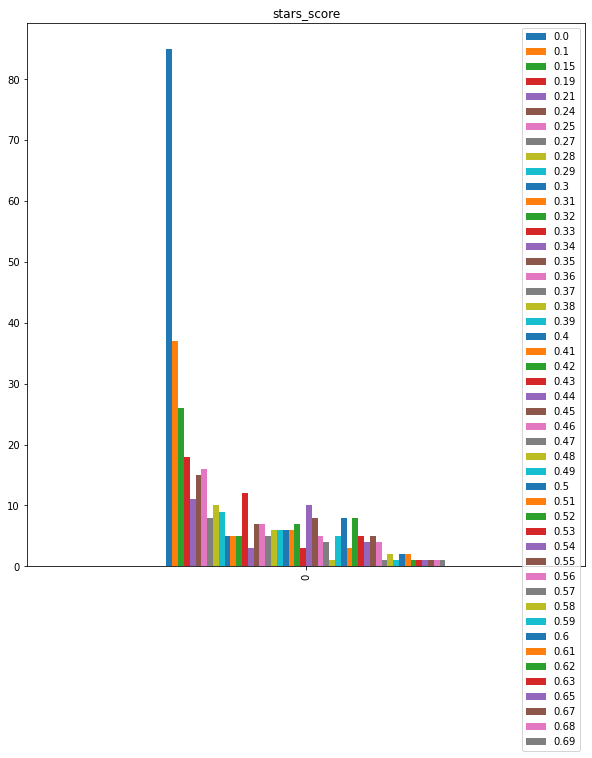

In [11]:
# diagram function sorted by key
def chart_feature_sorted_by_key(feature):
    n = df[feature].value_counts(sort = False)
    n = pd.Series(n.index.values, index=n )
    n = n.sort_values(ascending = True)
    n = pd.Series(n.index.values, index=n )
    df2=pd.DataFrame([n])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title=feature, sort_columns=False)
    fig = ax.get_figure()
    fig.savefig(feature + '.png')

# create diagram for stars_score
df = df.round({'stars_score': 2})
chart_feature_sorted_by_key('stars_score')

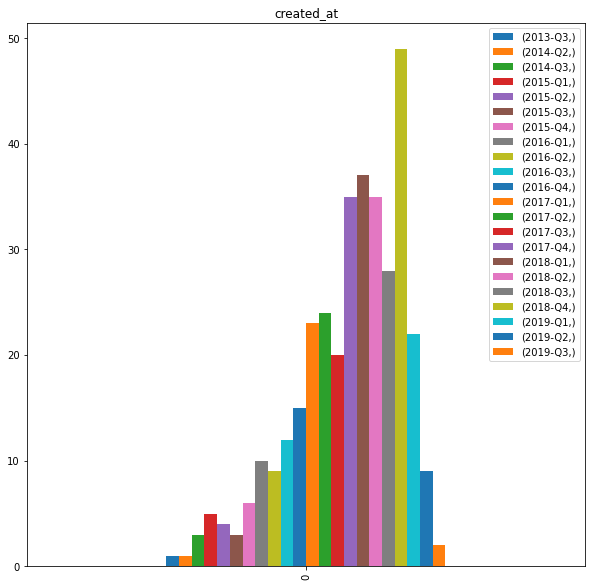

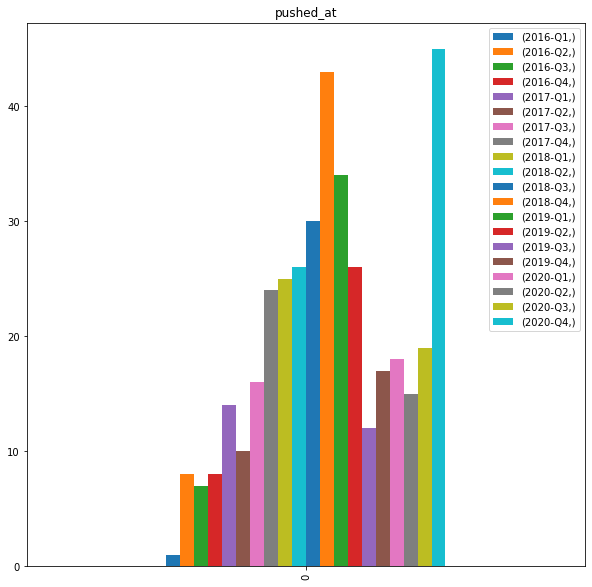

In [12]:
import math

# diagram activity
def chart_activity(feature):
    data = []

    for item in df[feature]:
        if isinstance(item, str):
            parts = item.split('-')
            quarter = math.ceil(int(parts[1]) / 3)
            data.append(parts[0]+'-Q'+str(quarter))
    
    df2 = pd.DataFrame(data)
    
    n = df2.value_counts(sort = False)
    n = pd.Series(n.index.values, index=n)
    n = n.sort_values(ascending = True)
    n = pd.Series(n.index.values, index=n)
    
    df2=pd.DataFrame([n])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title=feature)
    fig = ax.get_figure()
    fig.savefig(feature + '.png')
    
chart_activity('created_at')
chart_activity('pushed_at')